In [15]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [16]:
model = tf.keras.models.load_model('../models/18149074_0/checkpoints')
model

In [17]:
for d, a,b  in os.walk('../datasets/asl_alphabet_train/asl_alphabet_train/A'):
    files = filter(lambda f: f.endswith('g'), b) # jpg
    filenames = np.array(list(files))
    paths = np.array([os.path.join(d, f) for f in filenames])
    labels = np.array([f[0] for f in filenames])
labels = pd.Series(labels)
labels.values

array(['A', 'A', 'A', ..., 'A', 'A', 'A'], dtype=object)

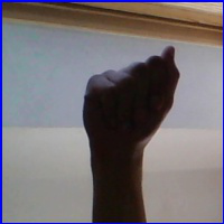

In [18]:
from IPython.display import Image 
imgs = [tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode='rgb', target_size=(224, 224),
    interpolation='bilinear'
) for path in paths]
display(imgs[0])

In [19]:
imarrs = np.array([tf.keras.preprocessing.image.img_to_array(img) for img in imgs])
imarrs.shape

(3000, 224, 224, 3)

(array([55310127., 30300131., 37115244., 39973682., 35974778., 63124695.,
        88316101., 50096622., 25981449., 25391171.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ], dtype=float32),
 <BarContainer object of 10 artists>)

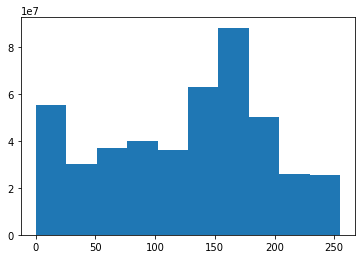

In [20]:
plt.hist(imarrs.flatten())

In [21]:
x = tf.convert_to_tensor(imarrs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x.shape

TensorShape([3000, 224, 224, 3])

(array([55310127., 30300131., 37115244., 39973682., 35974778., 63124695.,
        88316101., 50096622., 25981449., 25391171.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

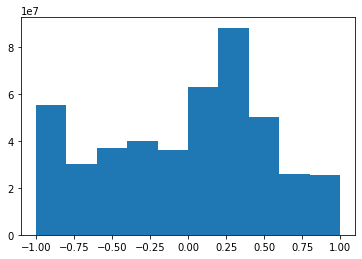

In [22]:
plt.hist(x.numpy().flatten())

A random batch

In [23]:
x1 = tf.random.uniform((32, 224, 224, 3))
model.predict(x1)[0]

array([0.02786004, 0.02252936, 0.02715564, 0.04199634, 0.0591142 ,
       0.02079628, 0.02172772, 0.02596243, 0.06435397, 0.0555875 ,
       0.0675097 , 0.03797217, 0.01947974, 0.06910249, 0.03280671,
       0.0356976 , 0.02549533, 0.02937444, 0.05871653, 0.05683943,
       0.02062677, 0.03809834, 0.07041091, 0.02354248, 0.02214282,
       0.02510105], dtype=float32)

Input images

In [24]:
predictions = model.predict(x)
predictions[0]

array([0.03094425, 0.02131178, 0.03173076, 0.04446482, 0.0545064 ,
       0.02073037, 0.02302857, 0.0278035 , 0.05481936, 0.05597812,
       0.0716145 , 0.04058596, 0.01975049, 0.06783653, 0.03206559,
       0.03514055, 0.02724808, 0.03041859, 0.05634034, 0.05326797,
       0.02017702, 0.03779039, 0.06896622, 0.02447401, 0.02561654,
       0.02338928], dtype=float32)

In [25]:
np.sum(predictions[0])

1.0

In [26]:
intlabels_p = np.argmax(predictions, axis=1)
intlabels_p

array([10, 10, 10, ..., 10, 10, 10])

In [27]:
intlabels, class_names = pd.factorize(labels.sort_values())
intlabels

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
sum(intlabels_p == intlabels), 'out of', len(x)

(0, 'out of', 3000)